In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


sns.set(style="whitegrid")
print("Setup complete 🧠")

Setup complete 🧠


In [26]:
# Step 1: Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Step 2: Display the first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [27]:
# Step 3: Dataset overview 
print("Shape (rows, columns):", df.shape)
print("\nColumn Info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

Shape (rows, columns): (8807, 12)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Missing values per column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rat

In [28]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [29]:
# Fill missing text fields with "Unknown"
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)


In [30]:
# Convert all text to lowercase for consistency
df['listed_in'] = df['listed_in'].str.lower()
df['type'] = df['type'].str.lower()


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [32]:
# Count number of movies and tv shows
df['type'].value_counts()

type
movie      6131
tv show    2676
Name: count, dtype: int64

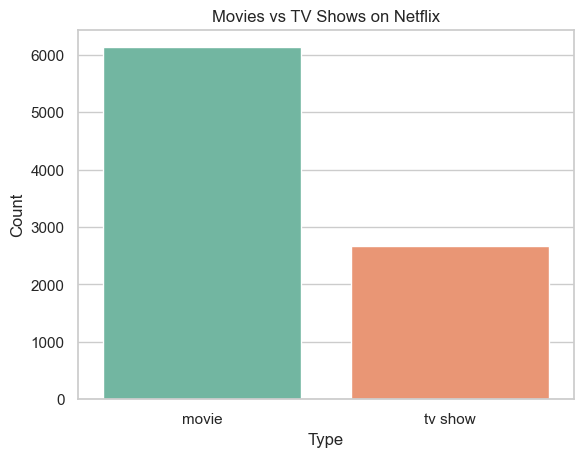

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='type', data=df, palette='Set2')
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


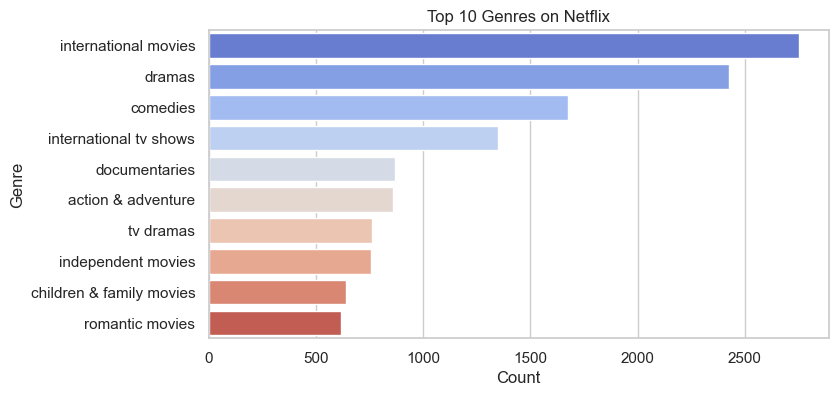

In [34]:
from collections import Counter

# Split genres by comma and flatten into one list
genres = df['listed_in'].dropna().apply(lambda x: x.split(', '))
genre_list = [g for sublist in genres for g in sublist]

# Count top 10 genres
top_genres = Counter(genre_list).most_common(10)

# Convert to DataFrame for plotting
import pandas as pd
top_genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

# Plot
plt.figure(figsize=(8,4))
sns.barplot(x='Count', y='Genre', data=top_genres_df, palette='coolwarm')
plt.title("Top 10 Genres on Netflix")
plt.show()


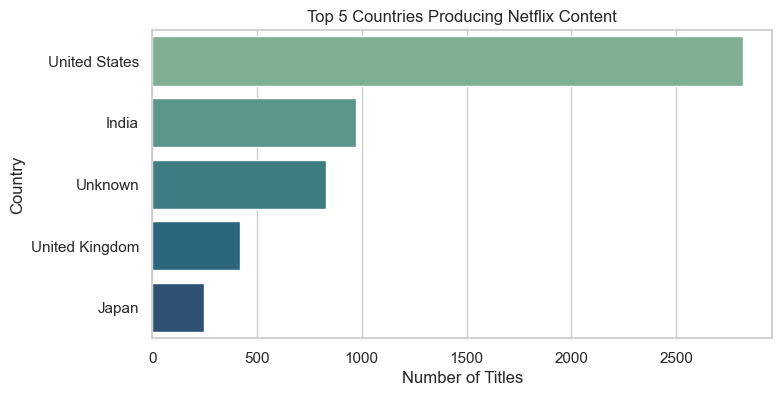

In [35]:
# Count top 5 countries
top_countries = df['country'].value_counts().head(5)

plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')
plt.title("Top 5 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


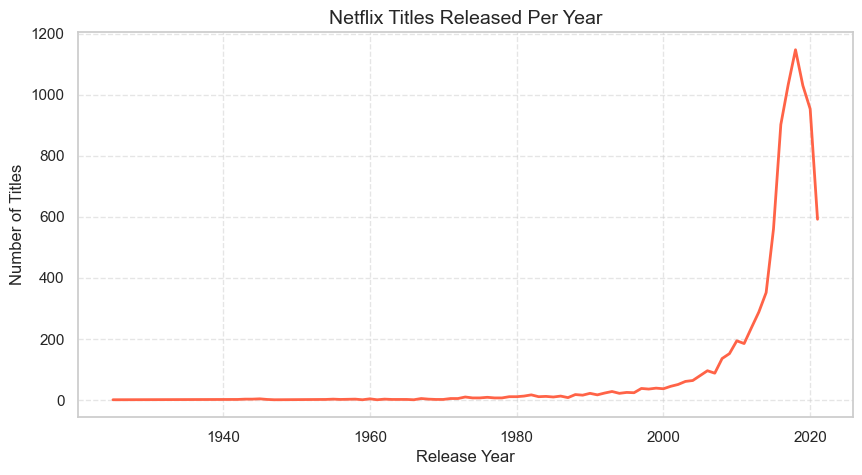

In [36]:
# Count how many titles were released each year
titles_per_year = df['release_year'].value_counts().sort_index()

# Plot a line chart to show the trend
plt.figure(figsize=(10,5))
plt.plot(titles_per_year.index, titles_per_year.values, color='tomato', linewidth=2)

plt.title("Netflix Titles Released Per Year", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Trend Analysis- Netflix Content Growth
The number of Netflix titles increased steadily through the 2010s, with a sharp rise between 2015 and 2019.  
This surge reflects Netflix’s global expansion and investment in original programming.  

The data shows nearly 1,000 titles released in 2019, marking the company’s most productive year.  
After 2020, the number of new releases slightly declined, likely due to production slowdowns during the COVID-19 pandemic.  
Overall, the trend highlights Netflix’s rapid growth into a global entertainment powerhouse.


🎬 Final Conclusions: What We Learned from the Netflix Dataset

Through this analysis, several key insights about Netflix’s content library emerged:

1. Movies dominate Netflix’s catalog, with significantly more movie titles than TV shows.  
   This indicates that while Netflix has expanded into series and documentaries, films still make up the majority of its offerings.

2. Popular genres such as *Drama*, Comedy, and Documentaries appear most frequently, showing that Netflix focuses heavily on emotionally engaging and story-driven content.

3. The United States leads in total content production, followed by *India* and the *United Kingdom*, reflecting Netflix’s global partnerships and licensing deals.

4. Content growth surged between 2015 and 2019, peaking at nearly 1,000 releases in 2019.  
   This corresponds to Netflix’s global expansion and its focus on producing original titles.  
   A small dip after 2020 likely reflects industry-wide slowdowns during the pandemic.

---

 Summary
This beginner-friendly project demonstrates how to:
- Clean and explore a real dataset using Pandas
- Visualize data with Matplotlib and Seaborn
- Extract meaningful insights and explain them clearly

The analysis highlights Netflix’s transformation from a DVD rental service into a global entertainment leader — powered by its investment in diverse, original content.

